## Exercises

**1.to 8** [在这里](https://www.jianshu.com/p/7c10132ae076)

## Setup

In [19]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "F:\ML\Machine learning\Hands-on machine learning with scikit-learn and tensorflow"
CHAPTER_ID = "08_ Dimensionality Reduction -- unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### 9

练习：加载MNIST数据集（在第3章中介绍）并将其拆分为训练集和测试集（将前60,000个实例用于训练，剩余的10,000个用于测试）。

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


练习：在数据集上训练**随机森林分类器**并计算所需的时间，然后在测试集上评估结果模型。

In [2]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)

In [3]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [4]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 3.47s


In [5]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455

练习：接下来，使用PCA来减少数据集的维度，解释方差比为95％。

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

练习：在简化数据集上训练一个新的随机森林分类器，看看它需要多长时间。 训练得快得多吗？

In [7]:
rnd_clf2 = RandomForestClassifier(random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 9.40s


不好了！ 现在训练速度实际上慢了两倍！  好吧，正如我们在本章中所看到的，**降维并不总是导致更快的训练时间：它取决于数据集，模型和训练算法**。
见图8-6（上面的manifold_decision_boundary_plot 图）。 **如果你尝试使用softmax分类器而不是随机森林分类器，您会发现使用PCA时训练时间减少了3倍**。 实际上，我们将在一秒钟内执行此操作，但首先让我们检查新随机森林分类器的精度。

练习：接下来评估测试集上的分类器：它与之前的分类器相比如何？

In [9]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8908

在降低维度时，性能会略微下降，因为我们在这个过程中确实失去了一些有用的信息 但是，在这种情况下，性能下降相当严重。 所以PCA真的没有帮助：它减慢了训练速度并降低了性能。

让我们看看使用softmax回归时是否有帮助：

In [10]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [11]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 10.28s


In [12]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

好的，因此**softmax回归在这个数据集上训练所需的时间比随机森林分类器要长得多**，而且在测试集上表现更差。但那不是我们现在感兴趣的，
我们想知道**多少PCA可以帮助softmax回归**。 让我们使用简化的数据集训练softmax回归模型：

In [13]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [14]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 4.40s


太好了！ 降低维数导致2.5倍的加速。 让我们看看模型的准确性：

In [15]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

性能略有下降，这可能是4倍加速的合理价格，具体取决于应用程序。

所以现在你知道它了：PCA可以给你一个强大的加速......但并不总是！

### 10
练习：

使用**t-SNE**将MNIST数据集缩减到二维，并使用Matplotlib绘制结果。 你可以使用10种不同颜色的散点图来表示每个图像的目标类。

让我们首先加载MNIST数据集：

In [17]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


**整个60,000张图像的降维需要很长时间，因此我们只在10,000张图像的随机子集上执行此操作**：

In [20]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

现在让我们**使用t-SNE将维数降低到2D**，这样我们就可以绘制数据集了：

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

现在让我们使用Matplotlib的**scatter（）函数**绘制散点图，为每个数字使用不同的颜色：

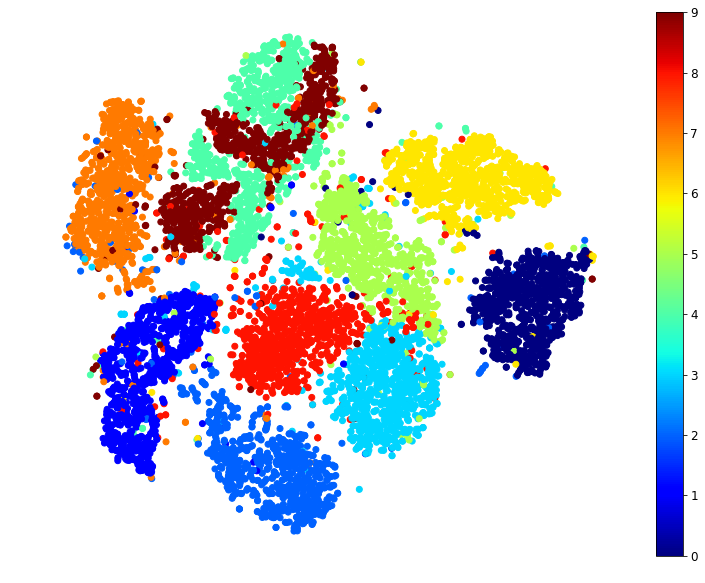

In [23]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

这是不是很美？:)
该图表告诉我们
* 哪些数字很容易与其他数字区分开来（例如，0s，6s和大多数8s是相当好的分离的簇），
* 哪些数字通常难以区分（例如，4s和9s，5s和3s，等等）。

我们更多的关注数字3和5，它们似乎重叠很多。

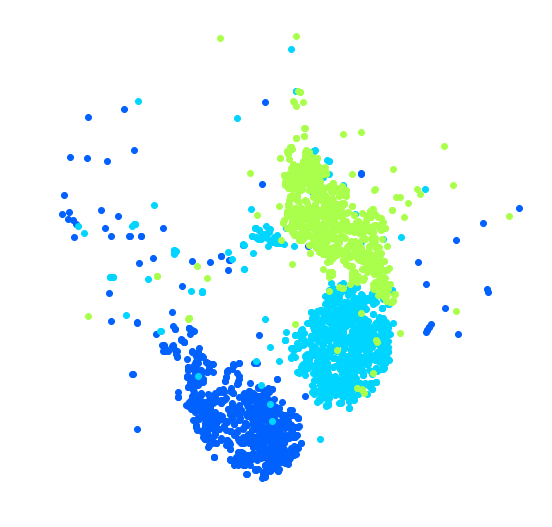

In [24]:
plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

让我们看看我们是否可以通过**在这3个数字上运行t-SNE**来生成更好的图像：

In [25]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

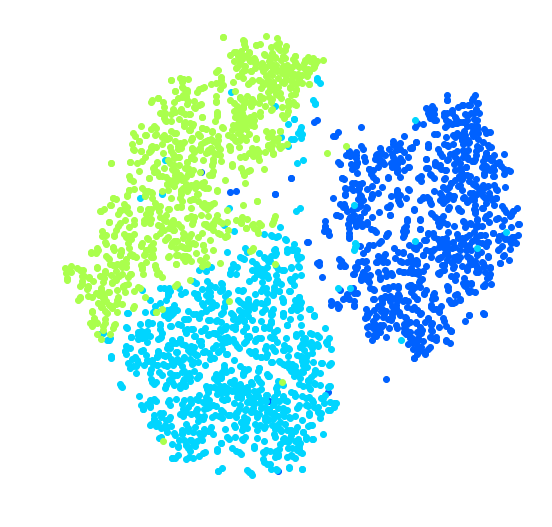

In [26]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

好多了，现在集群的重叠程度要小得多。但是数字 3 到处都是。此外，还有两个不同的数字 2 簇，以及两个不同的数字 5 簇。
**如果我们可以从每个集群中可视化几个数字，那将是很好的，以了解为什么会这样**。我们现在就这样做。

练习：或者，你可以在每个实例的位置写入彩色数字，甚至可以绘制数字图像本身的缩小版本（如果你绘制所有数字，可视化将太杂乱，因此你应该绘制随机样本或者仅在没有其他实例已经在近距离绘制时绘制实例）。你应该使用分离良好的数字簇来获得良好的可视化效果。

让我们创建一个**plot_digits（）函数**来绘制散点图（类似于上面的散点图）加上写彩色数字，这些数字之间保证最小距离。如果提供了数字图像，则会绘制它们。此实现的灵感来自Scikit-Learn的一个优秀示例（[plot_lle_digits](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html)，基于不同的数字数据集）。

In [31]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # 缩放输入特征，使其范围从0到1
    X_normalized = MinMaxScaler().fit_transform(X)
    # 现在我们创建到目前为止绘制的数字坐标列表.
    # 我们假设一个已经在开始时很远的地方被绘制，以避免在下面的循环中使用`if`语句
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

我们来试试吧！ 首先让我们写下彩色数字：

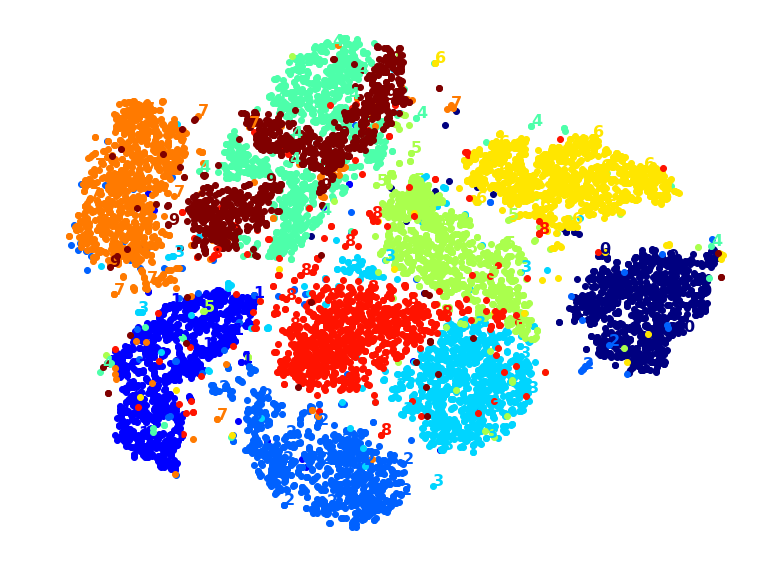

In [32]:
plot_digits(X_reduced, y)

嗯，没关系，但不是那么美丽。 让我们试试数字图像：

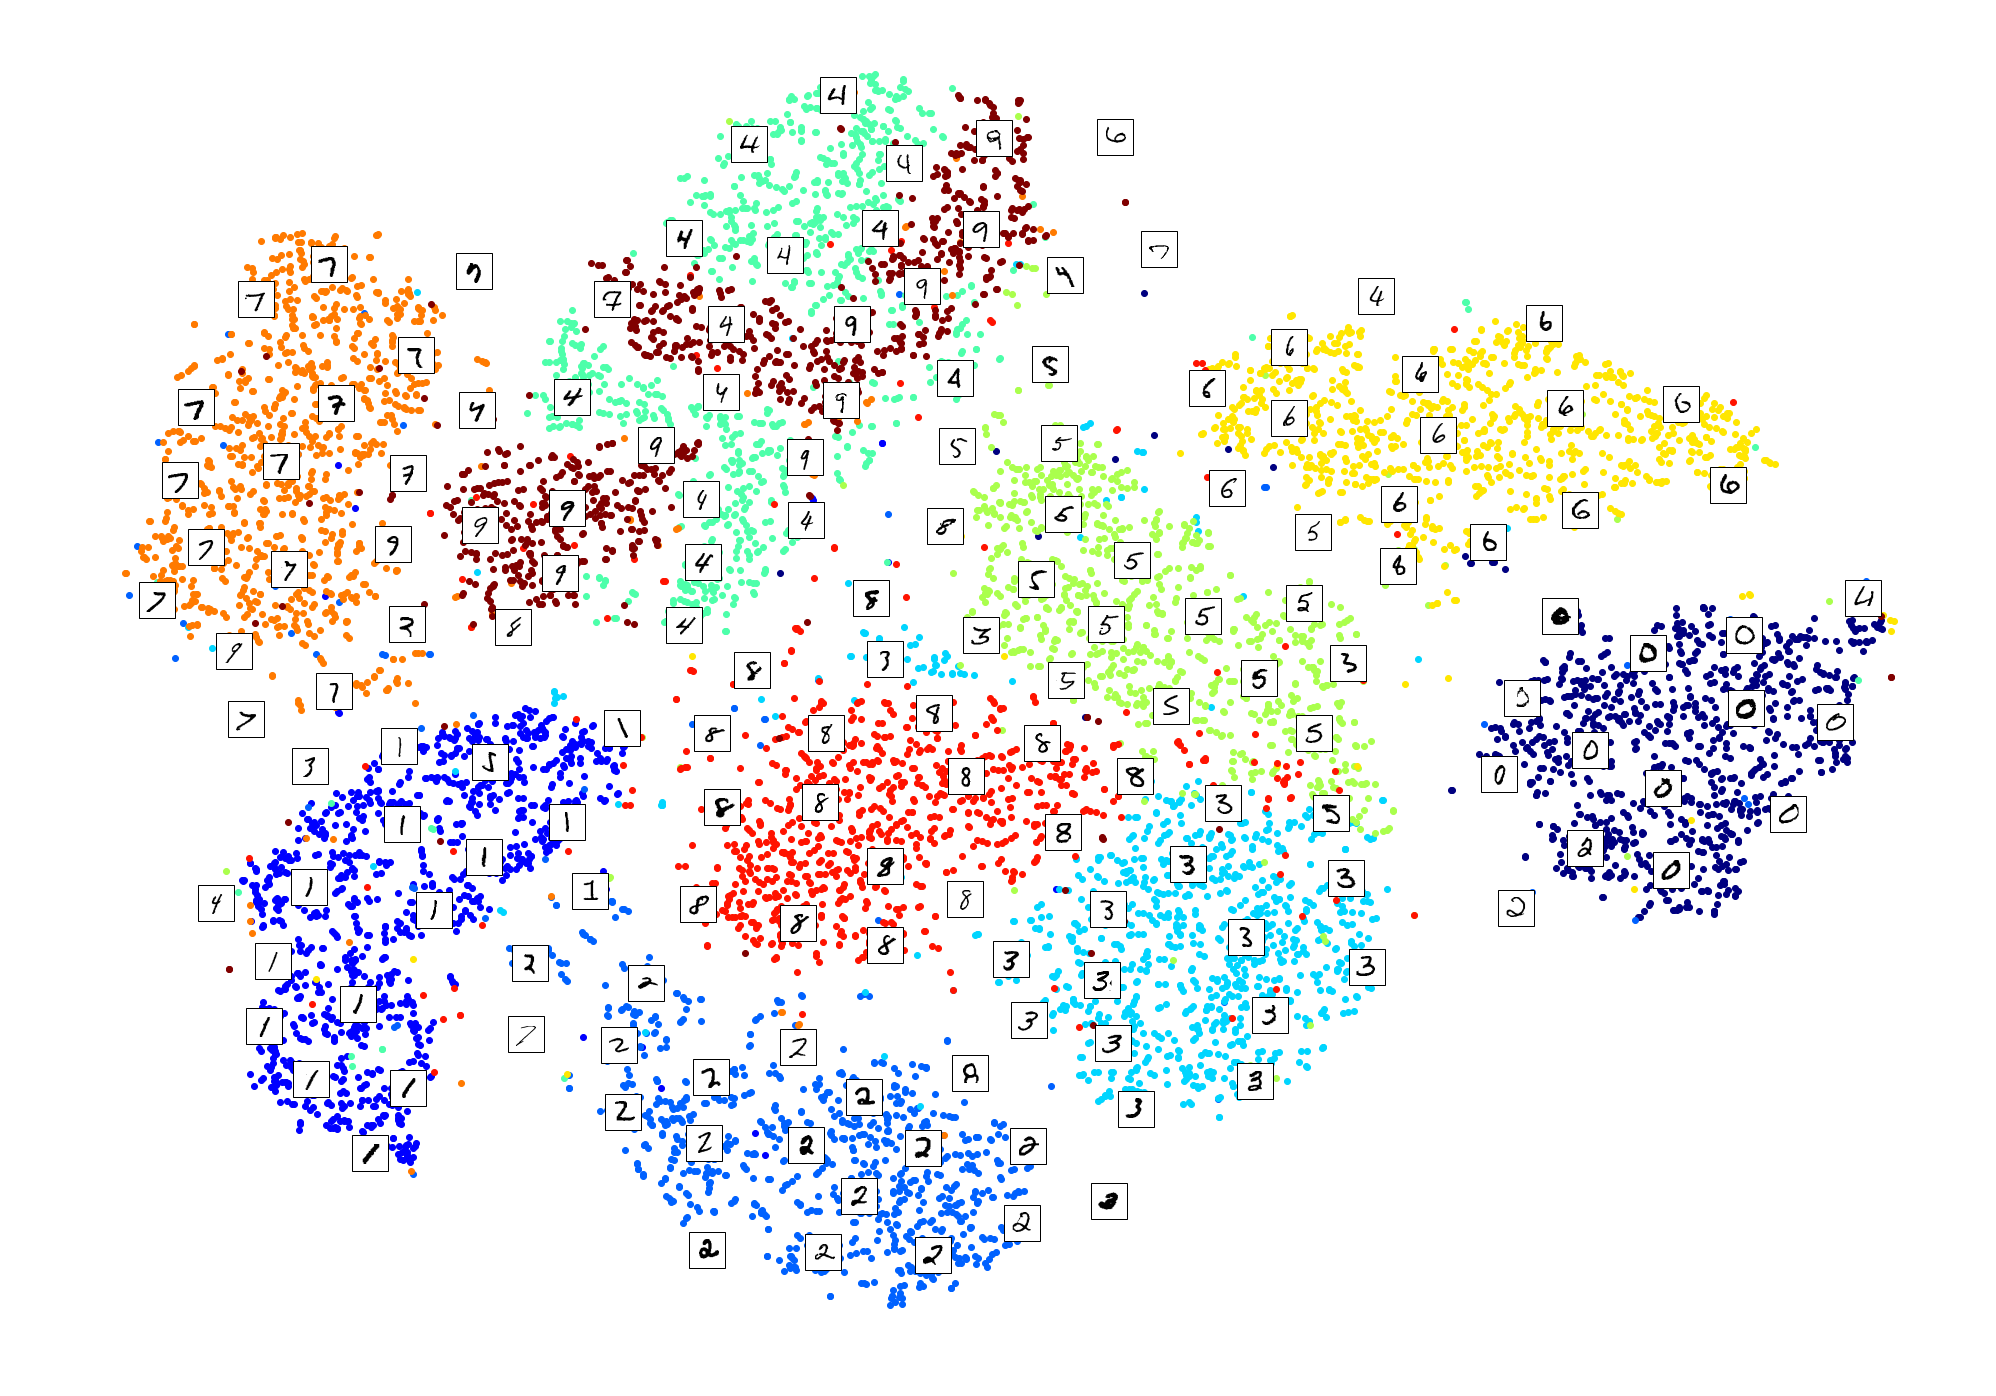

In [33]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

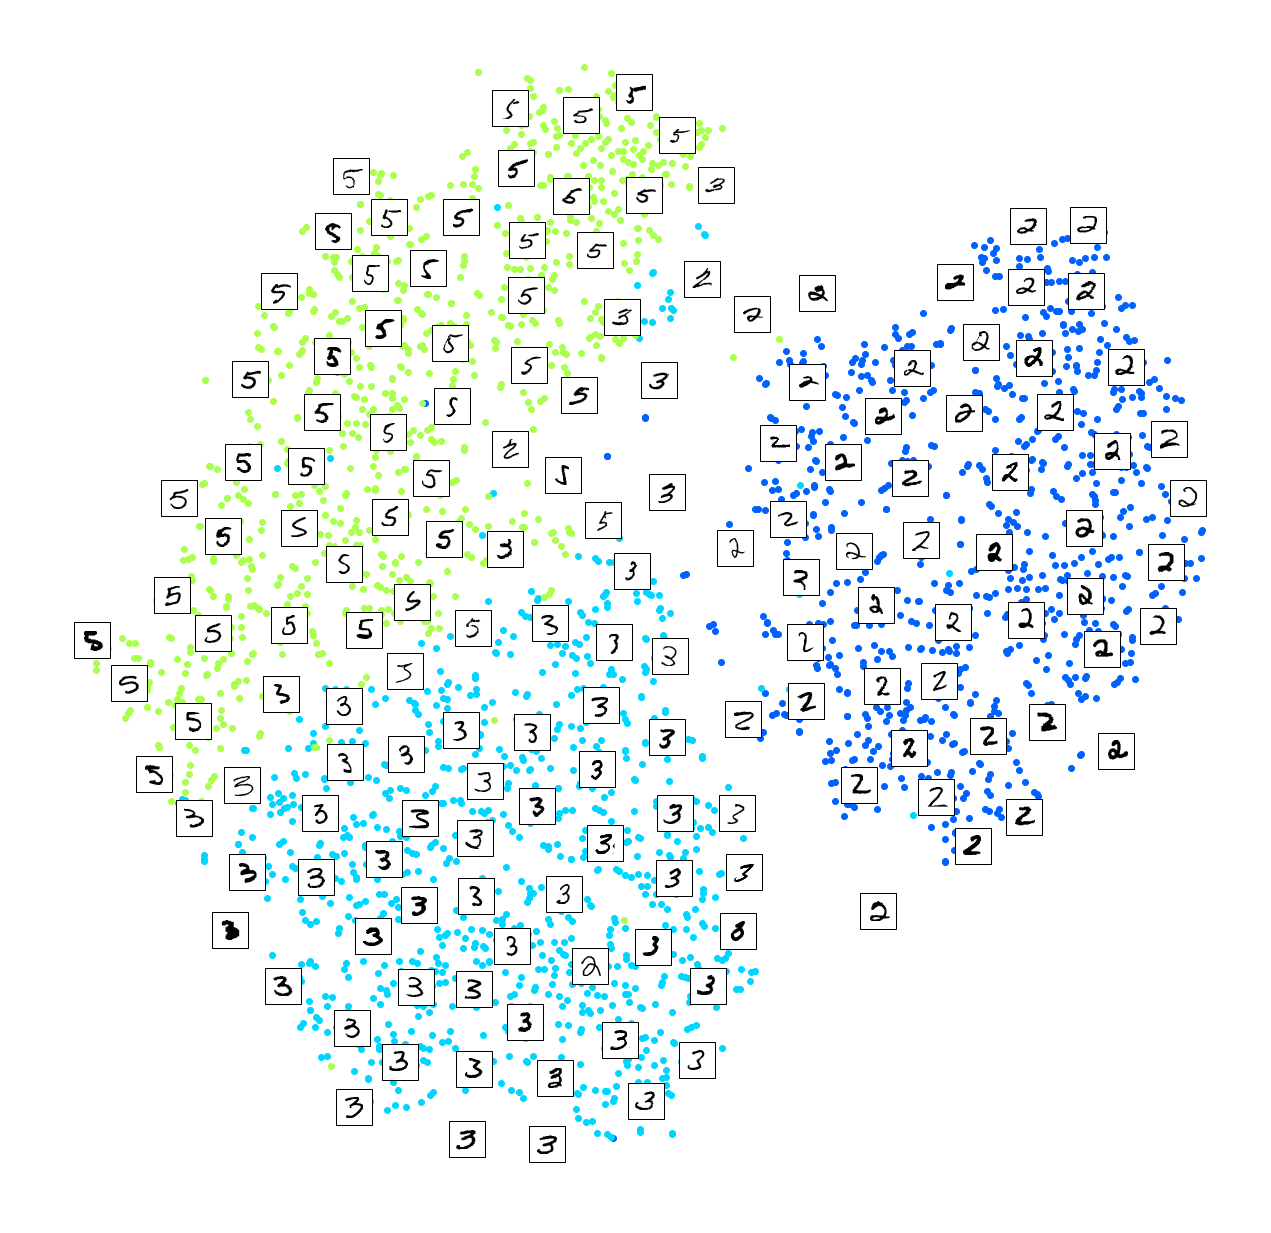

In [34]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

练习：尝试使用其他降维算法（如PCA，LLE或MDS）并比较生成的可视化。

让我们从PCA开始吧。 我们还将花费多长时间：

PCA took 0.3s.


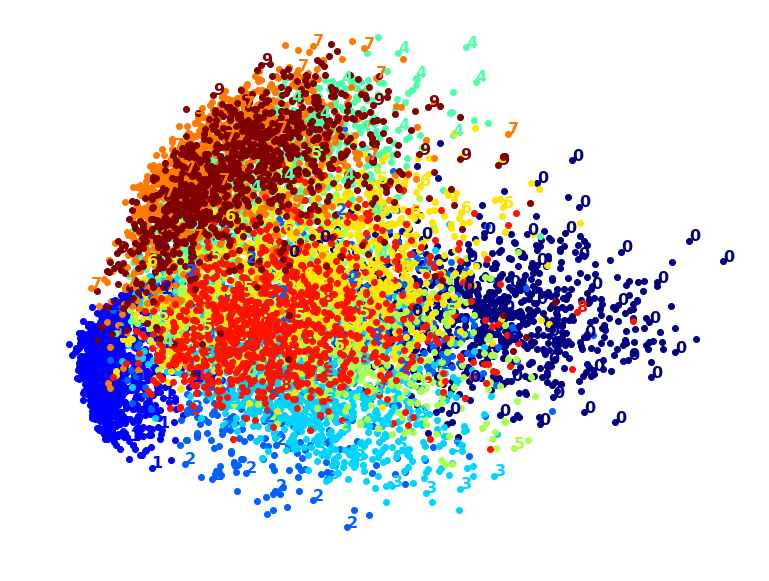

In [35]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

哇，PCA速度非常快！ 但是虽然我们确实看到了一些集群，但是重叠的方式太多了。 我们来试试LLE：

LLE took 166.3s.


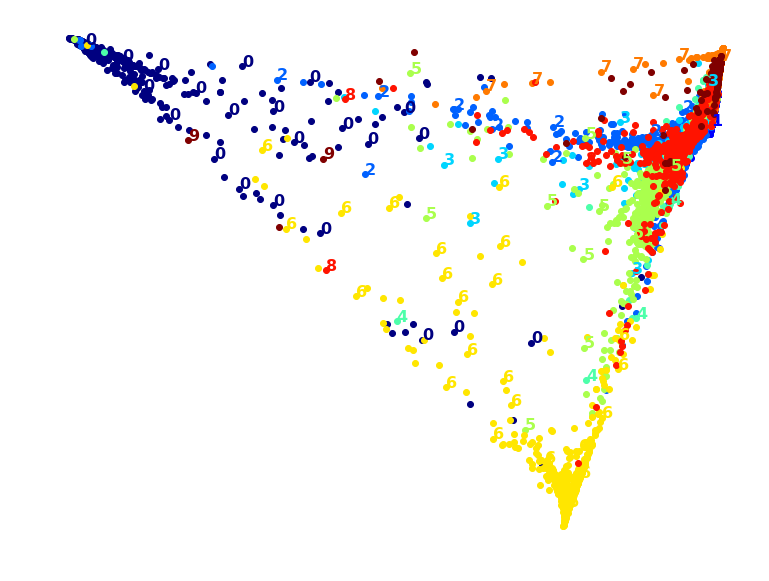

In [36]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

这需要一段时间，结果看起来不太好。让我们看看如果我们首先应用PCA会发生什么，保留95％的方差：

PCA+LLE took 59.8s.


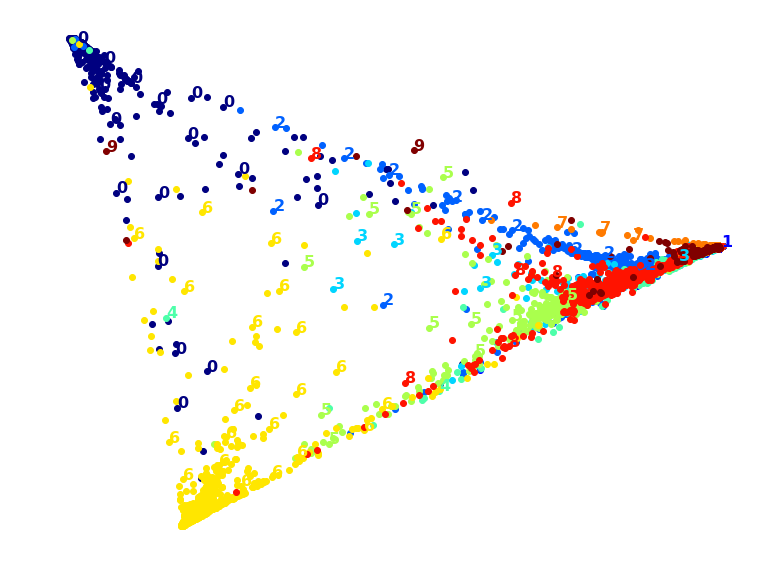

In [37]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

结果或多或少相同，但这次它快了近4倍。

我们来试试MDS。如果我们在10,000个实例上运行它太长了，所以现在让我们尝试2000：

MDS took 153.6s (on just 2,000 MNIST images instead of 10,000).


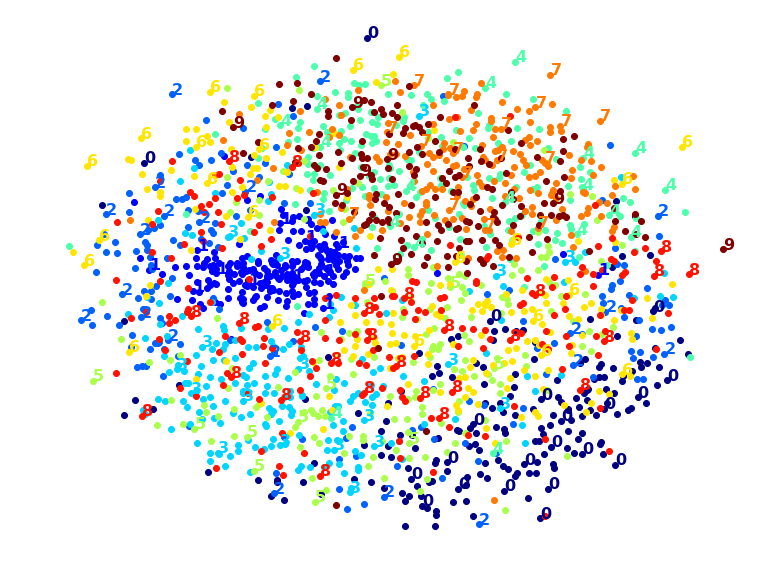

In [38]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

咩。 这看起来不太好，所有集群都重叠太多。 让我们首先尝试使用PCA，也许它会更快？

PCA+MDS took 150.9s (on 2,000 MNIST images).


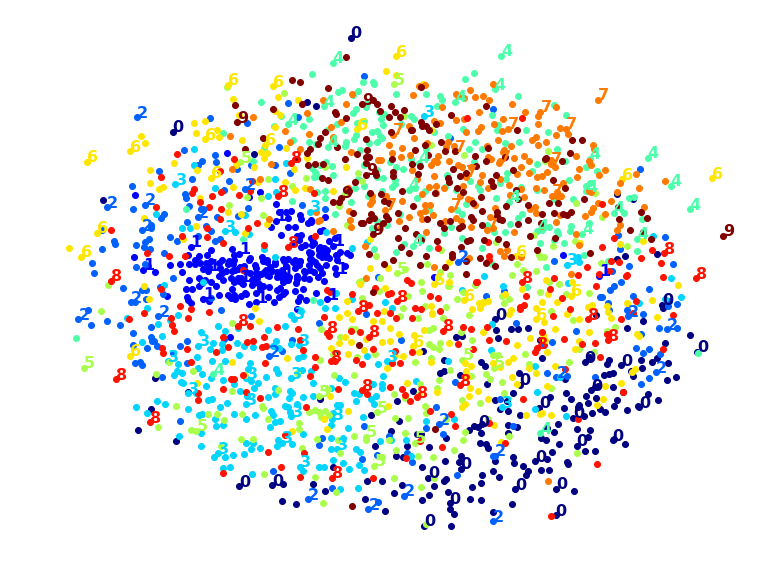

In [40]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

同样的结果，没有加速：PCA没有帮助（或伤害）。

我们来试试LDA吧：

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA took 2.1s.


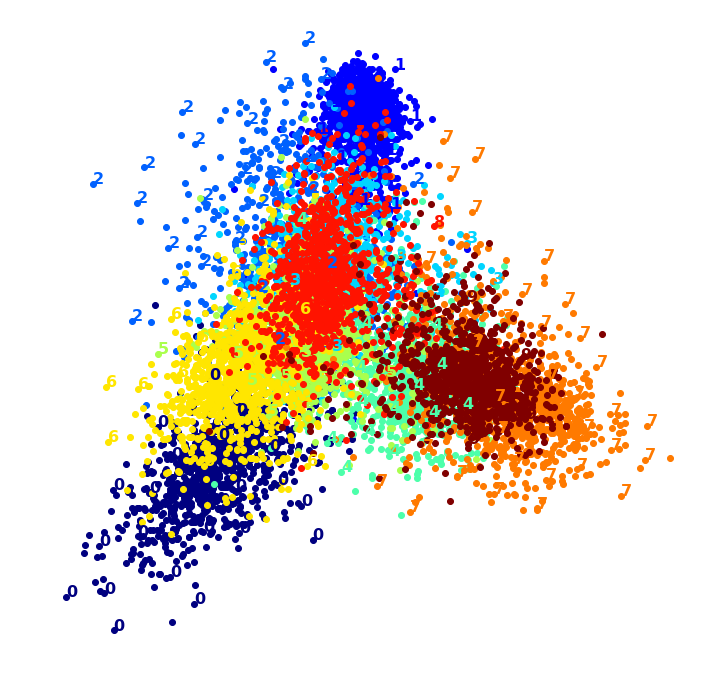

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

这个非常快，一开始看起来不错，直到你意识到几个集群严重重叠。

嗯，很明显t-SNE赢得了这场小比赛，你不同意吗？ 我们没有夸大它，所以我们现在就这样做：

t-SNE took 228.7s.


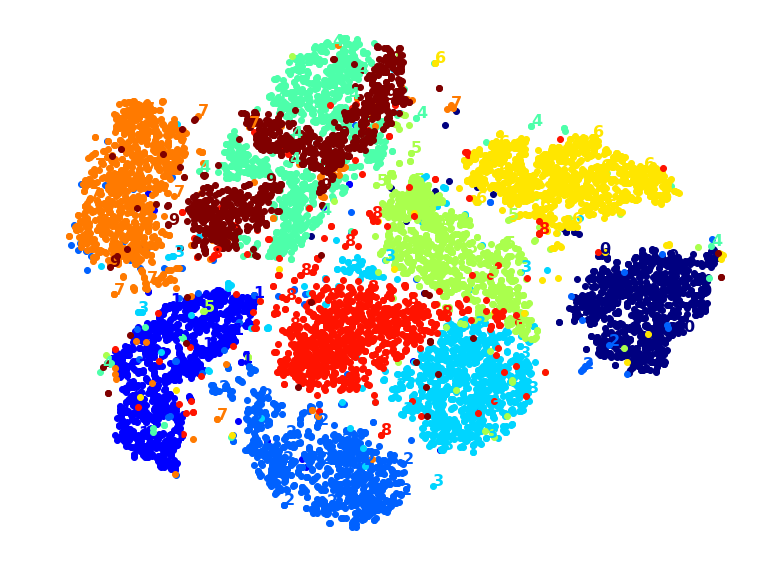

In [42]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

它比LLE慢两倍，但仍然比MDS快得多，结果看起来很棒。 让我们来看看PCA是否可以加快速度

PCA+t-SNE took 132.9s.


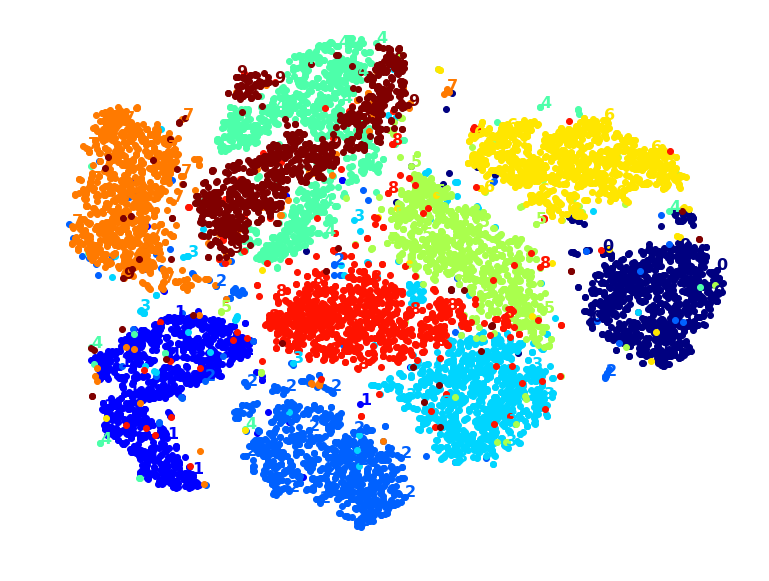

In [43]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

是的，PCA大致给了我们25％的加速，而不会损害结果。 我们有一个胜利者！